In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from theano import tensor as tt
import pymc3 as pm
import arviz as az

RANDOM_SEED = 12345
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")

You now must copy the digital biomarkers dataset, `dbm_example_2021_01.txt`, into the `/data` folder located at the root of the repository.

In [2]:
df = pd.read_csv(os.path.join("..", "data", "dbm_example_2021_01.txt"), delimiter="\t")
df = df[np.logical_not(np.isinf(df.dbm_seconds_feature))].reset_index(drop=True)
df

,reltime_days,participant_id,easyness_level,dbm_count_feature,dbm_seconds_feature,clin_percent_feature,age_years,EPOCH
0,0.000000,P01,2,23,1.428571,50.00,19.0,VISIT1
1,1.942847,P01,2,24,1.428571,50.00,19.0,VISIT1
2,3.925567,P01,2,24,1.250000,50.00,19.0,VISIT1
3,5.966007,P01,2,26,1.111111,50.00,19.0,VISIT1
4,7.880428,P01,2,25,1.250000,50.00,19.0,VISIT1
...,...,...,...,...,...,...,...,...
297,127.994792,P14,3,22,1.428571,57.29,9.0,VISIT2
298,129.950093,P14,3,21,1.428571,57.29,9.0,VISIT2
299,133.947350,P14,3,24,1.250000,57.29,9.0,VISIT2
300,137.988113,P14,3,29,1.000000,57.29,9.0,VISIT2


## Data exploration and visualization

We'll do some quick data visualizations to see if there is any obvious relationship hidden in the dataset

/home/lpaz/anaconda3/envs/bayes_workshop/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  self.fig.tight_layout(*args, **kwargs)


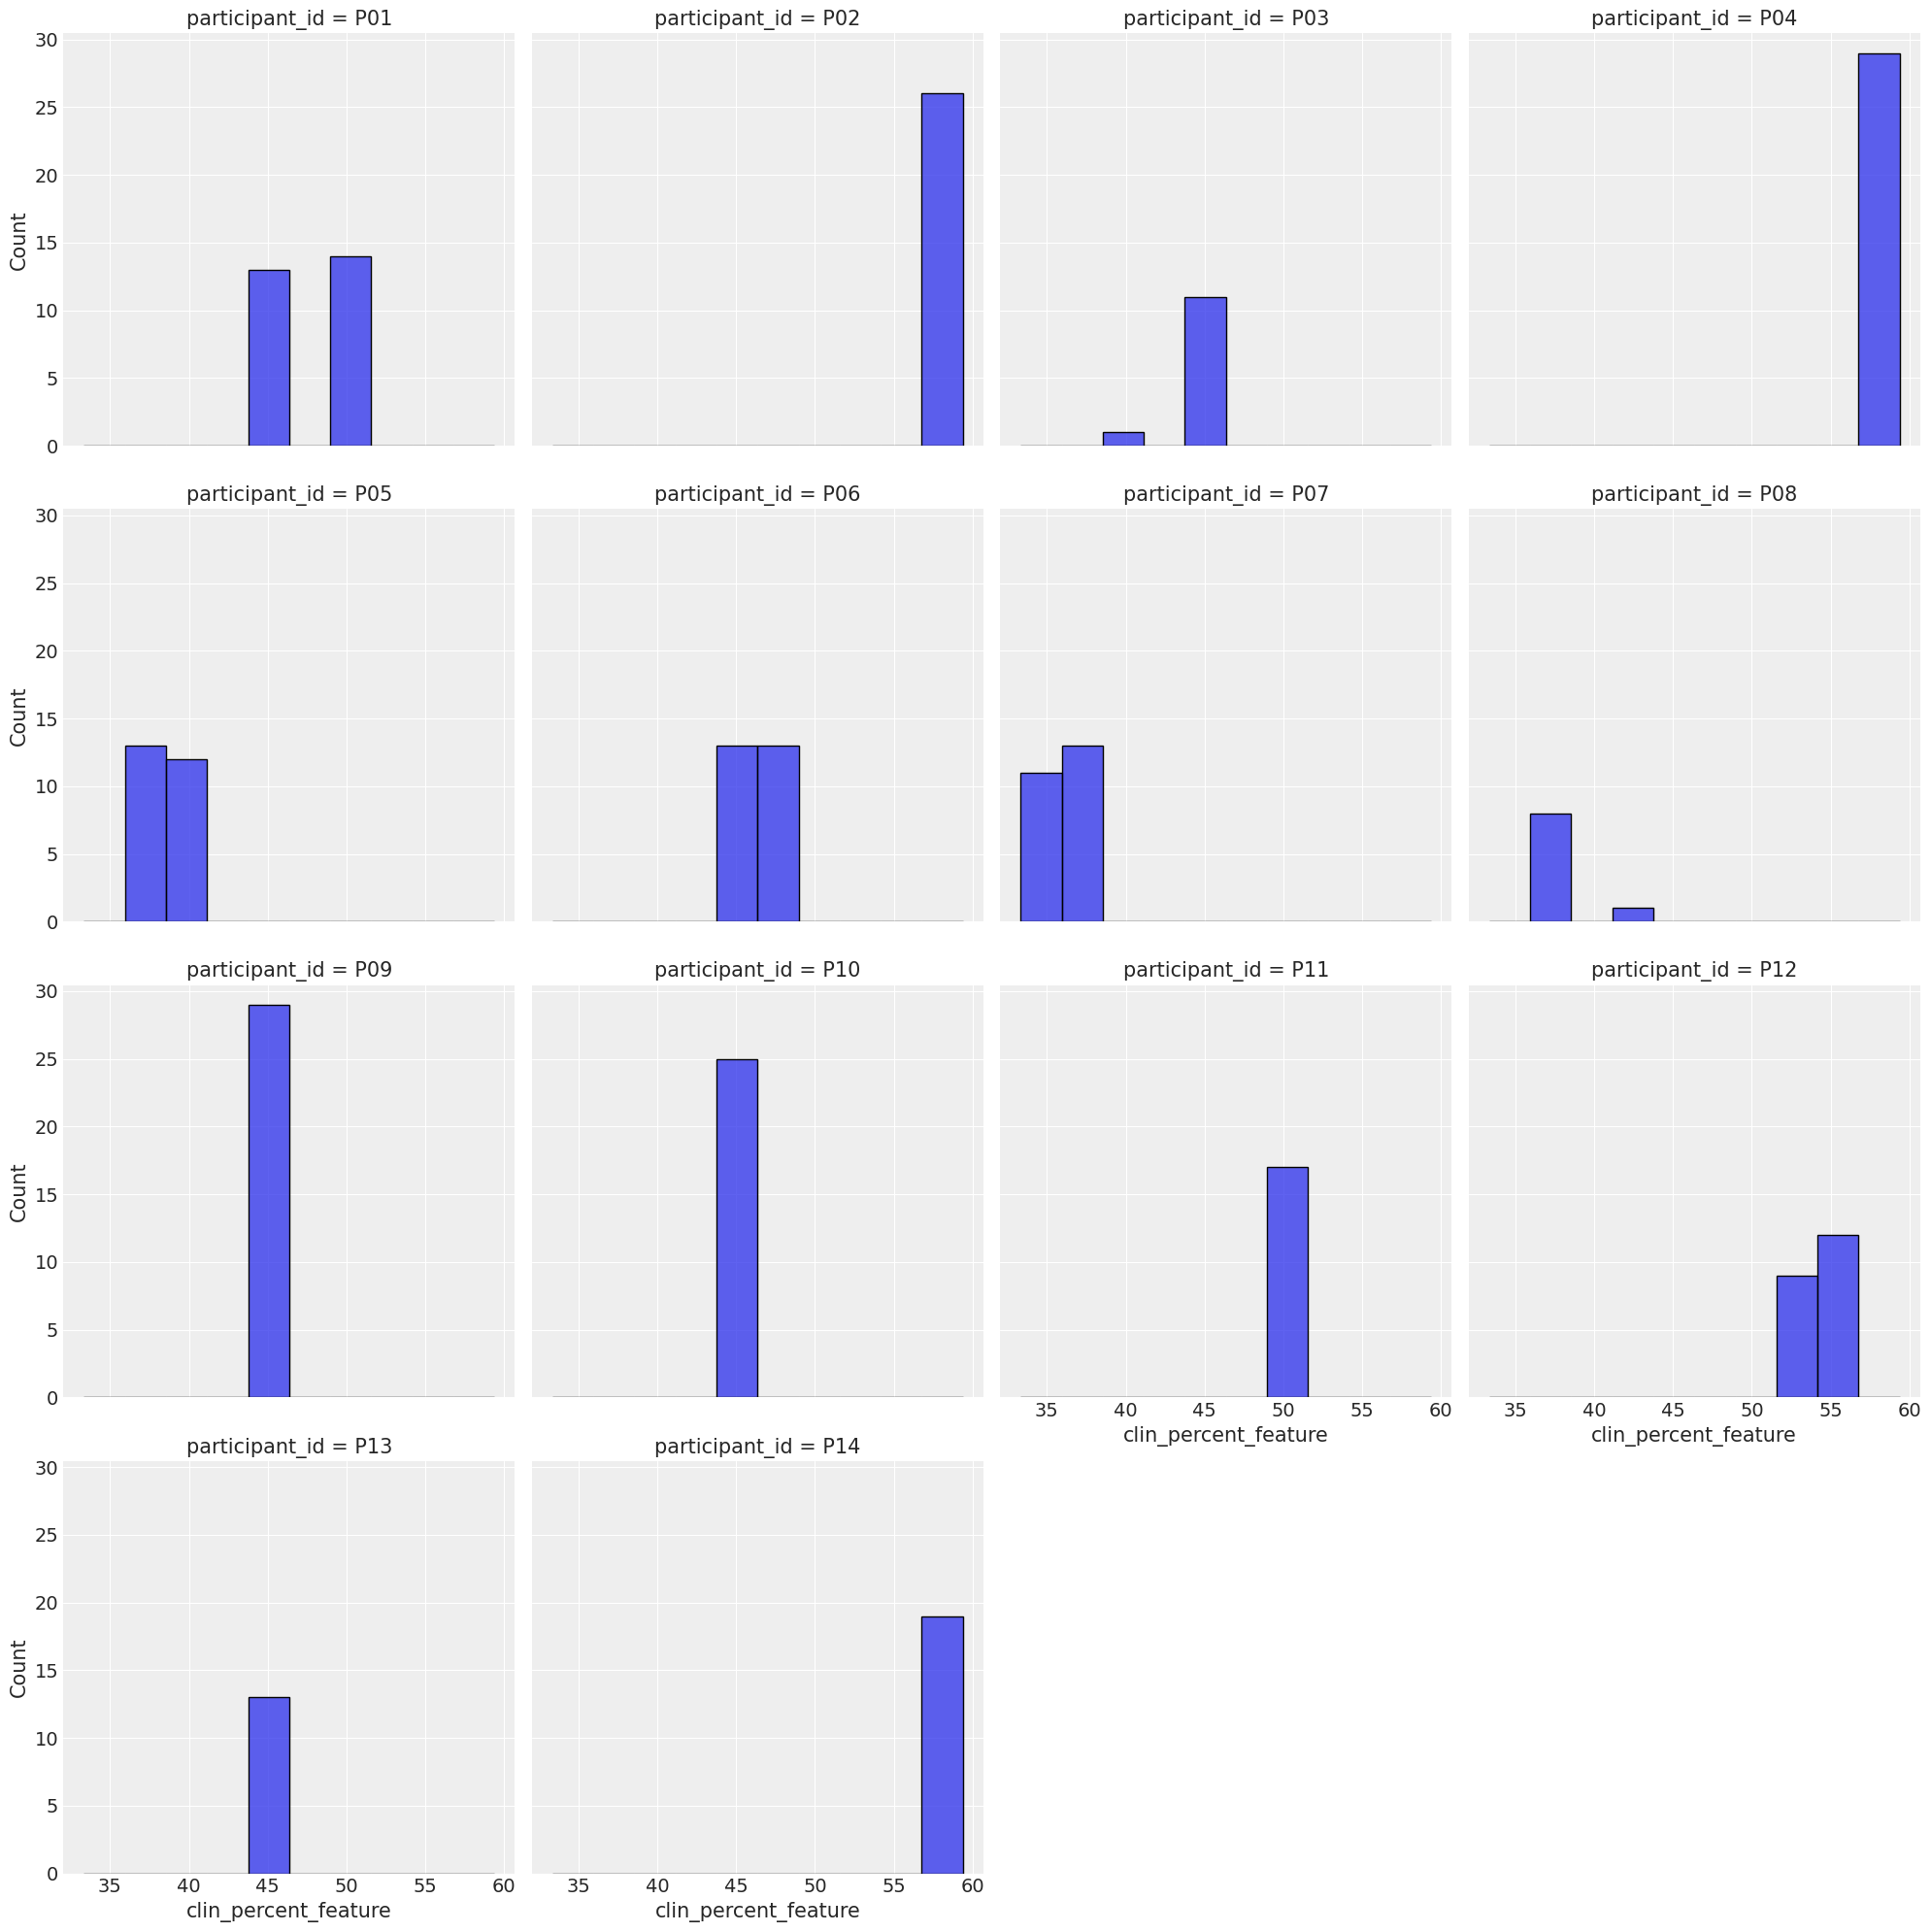

In [3]:
sns.displot(df, x="clin_percent_feature", col="participant_id", col_wrap=4, kind="hist");

/home/lpaz/anaconda3/envs/bayes_workshop/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  self.fig.tight_layout(*args, **kwargs)


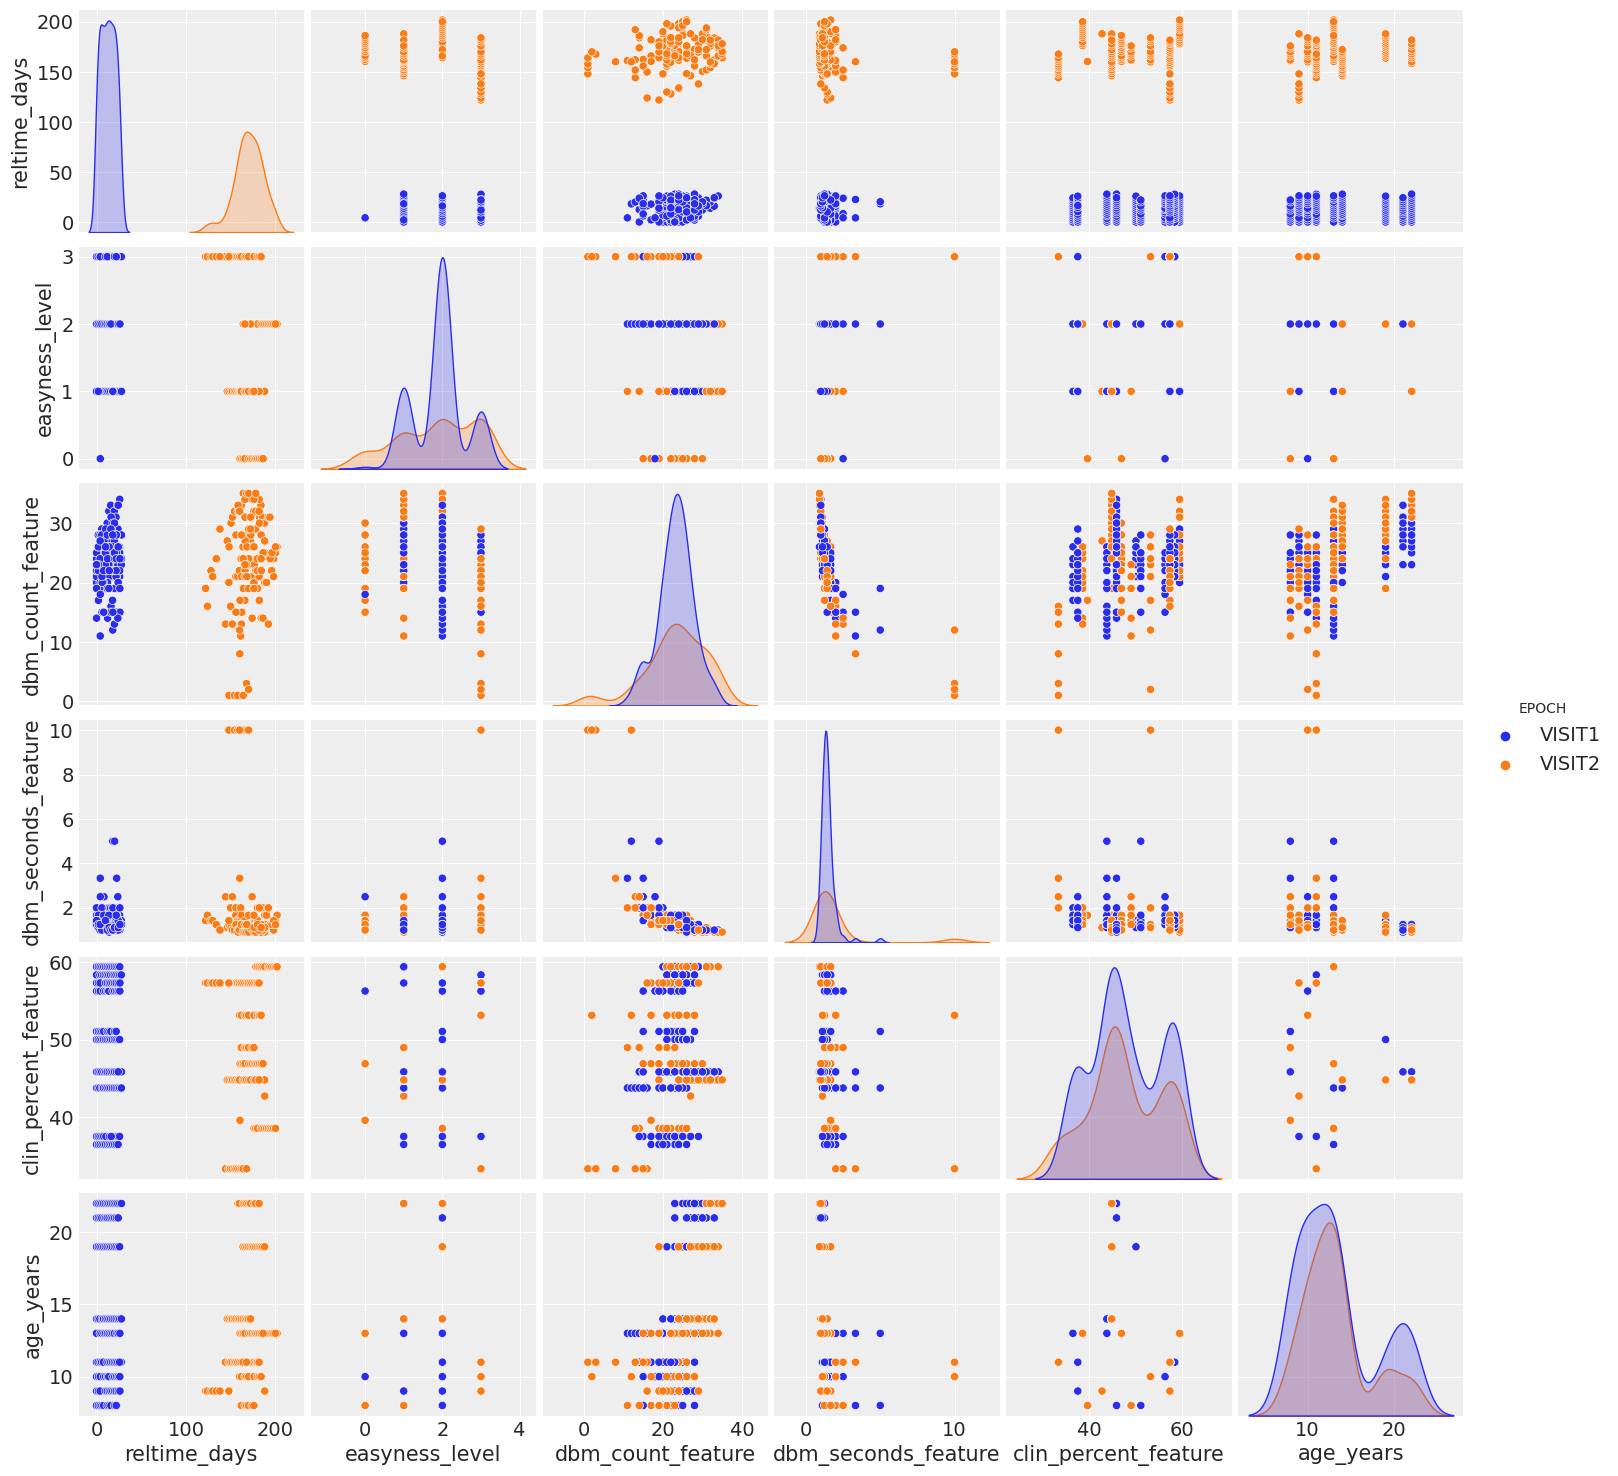

In [4]:
sns.pairplot(df, hue="EPOCH");

Strong correlation between both digital biomarkers `dbm_count_feature` and `dbm_seconds_feature`. No obvious global correlation with `clin_percent_feature`.

/home/lpaz/anaconda3/envs/bayes_workshop/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  self.fig.tight_layout(*args, **kwargs)


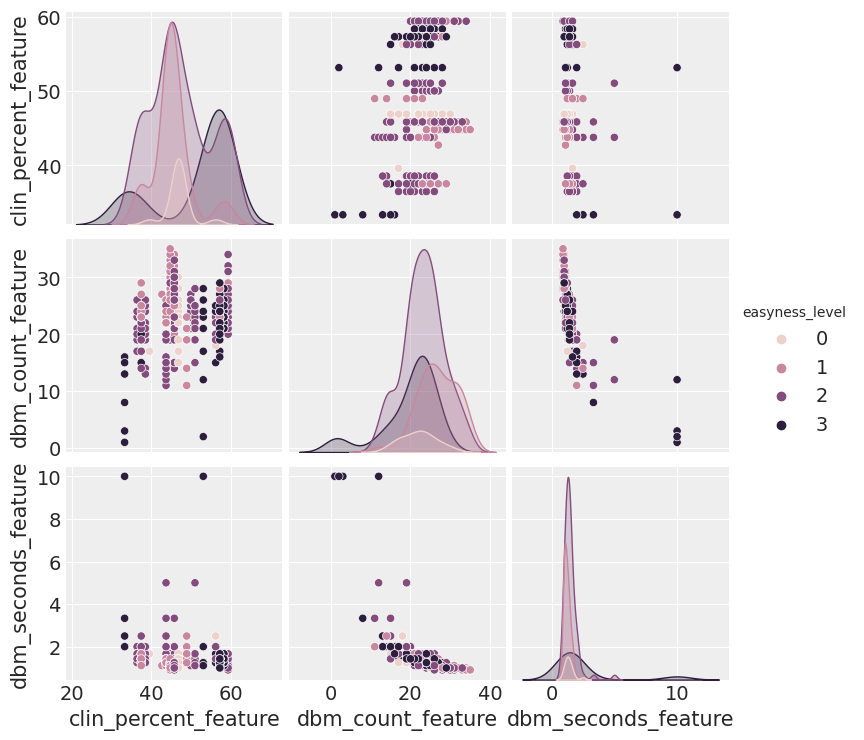

In [5]:
sns.pairplot(
    df,
    vars=["clin_percent_feature", "dbm_count_feature", "dbm_seconds_feature"],
    hue="easyness_level",
);

It's difficult to see an obvious relationship with `easyness_level`.

/home/lpaz/anaconda3/envs/bayes_workshop/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  self.fig.tight_layout(*args, **kwargs)
/home/lpaz/anaconda3/envs/bayes_workshop/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/lpaz/anaconda3/envs/bayes_workshop/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


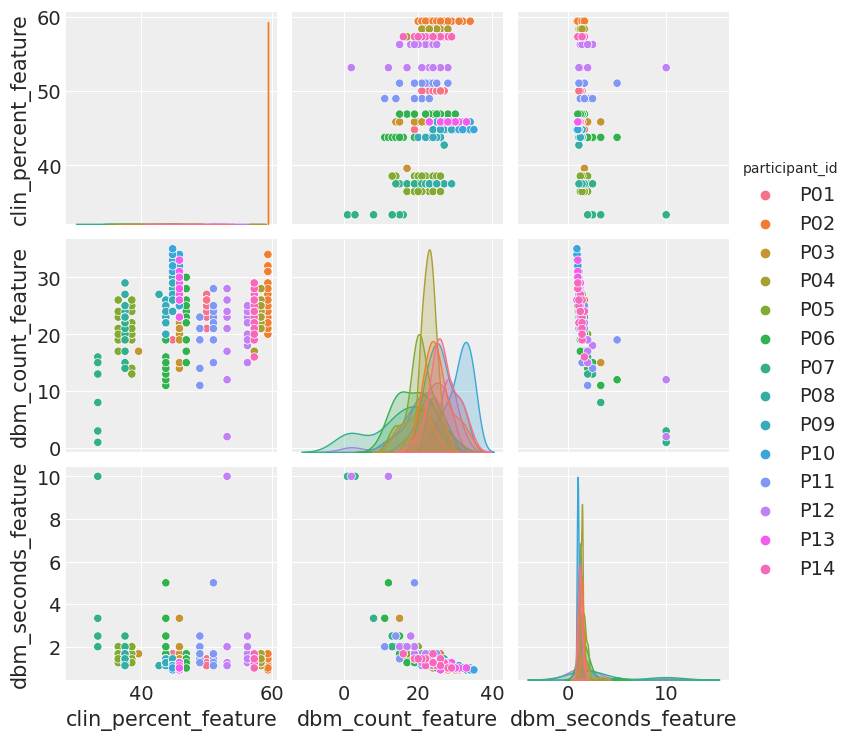

In [6]:
sns.pairplot(
    df,
    vars=["clin_percent_feature", "dbm_count_feature", "dbm_seconds_feature"],
    hue="participant_id",
);

Participants show very diverse `clin_percent_feature` even though they show small dispersion in the `dbm_count_feature`.

/home/lpaz/anaconda3/envs/bayes_workshop/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  self.fig.tight_layout(*args, **kwargs)
/home/lpaz/anaconda3/envs/bayes_workshop/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


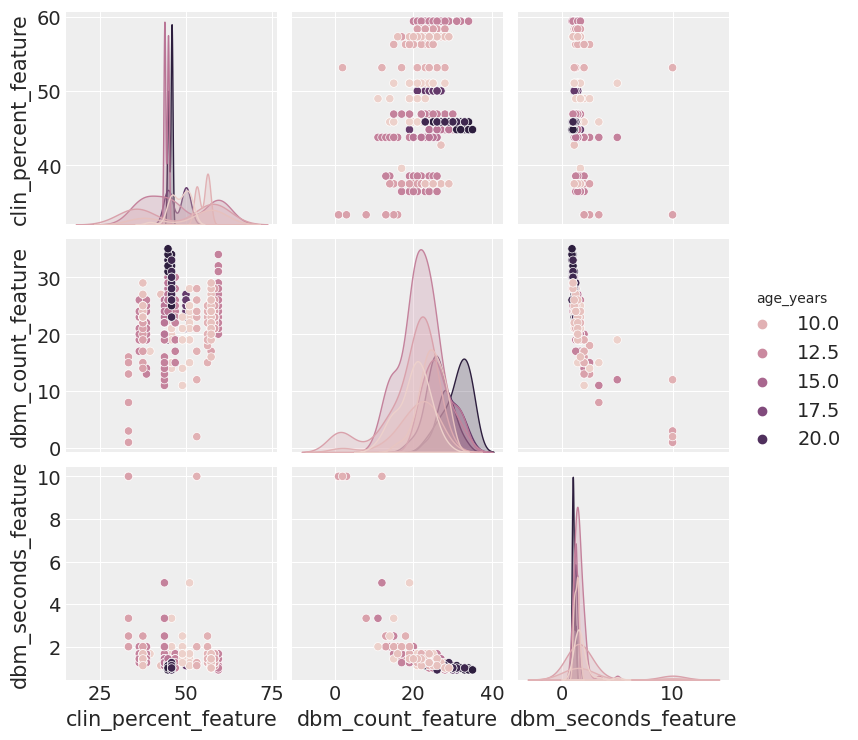

In [7]:
sns.pairplot(
    df,
    vars=["clin_percent_feature", "dbm_count_feature", "dbm_seconds_feature"],
    hue="age_years",
);

/home/lpaz/anaconda3/envs/bayes_workshop/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  self.fig.tight_layout(*args, **kwargs)


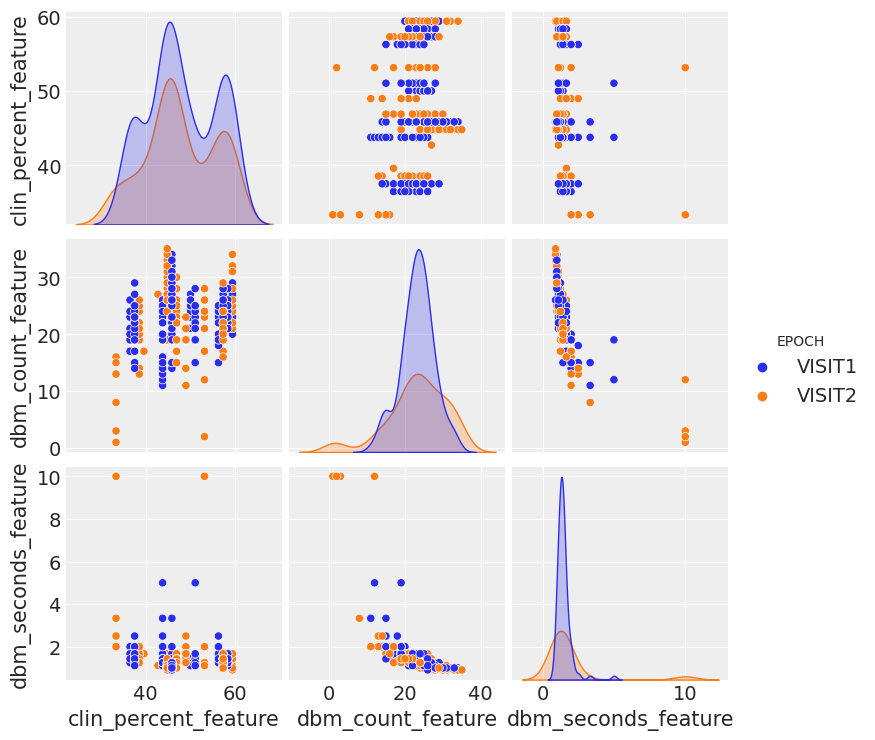

In [8]:
sns.pairplot(
    df,
    vars=["clin_percent_feature", "dbm_count_feature", "dbm_seconds_feature"],
    hue="EPOCH",
);

/home/lpaz/anaconda3/envs/bayes_workshop/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  self.fig.tight_layout(*args, **kwargs)


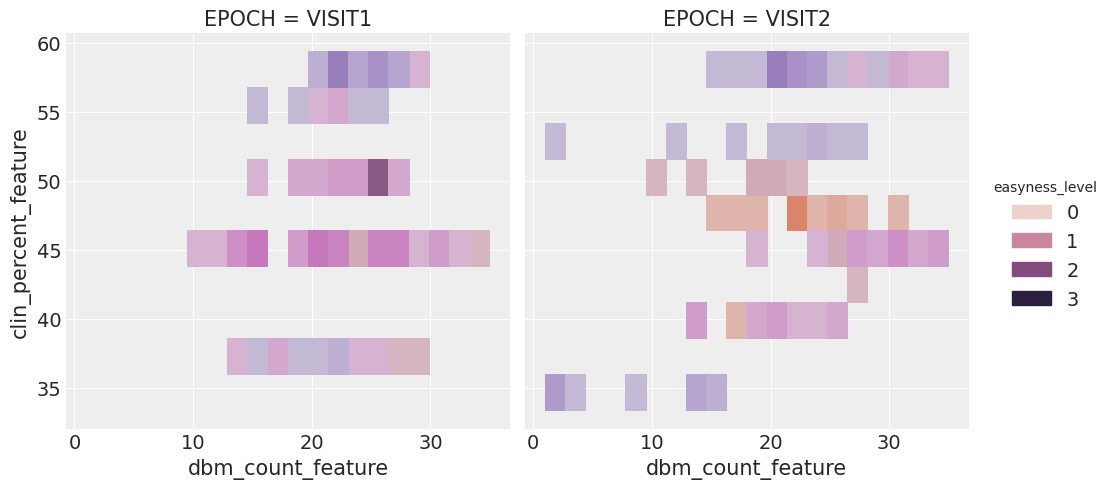

In [9]:
sns.displot(
    df,
    x="dbm_count_feature",
    y="clin_percent_feature",
    col="EPOCH",
    hue="easyness_level"
);

/home/lpaz/anaconda3/envs/bayes_workshop/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  self.fig.tight_layout(*args, **kwargs)


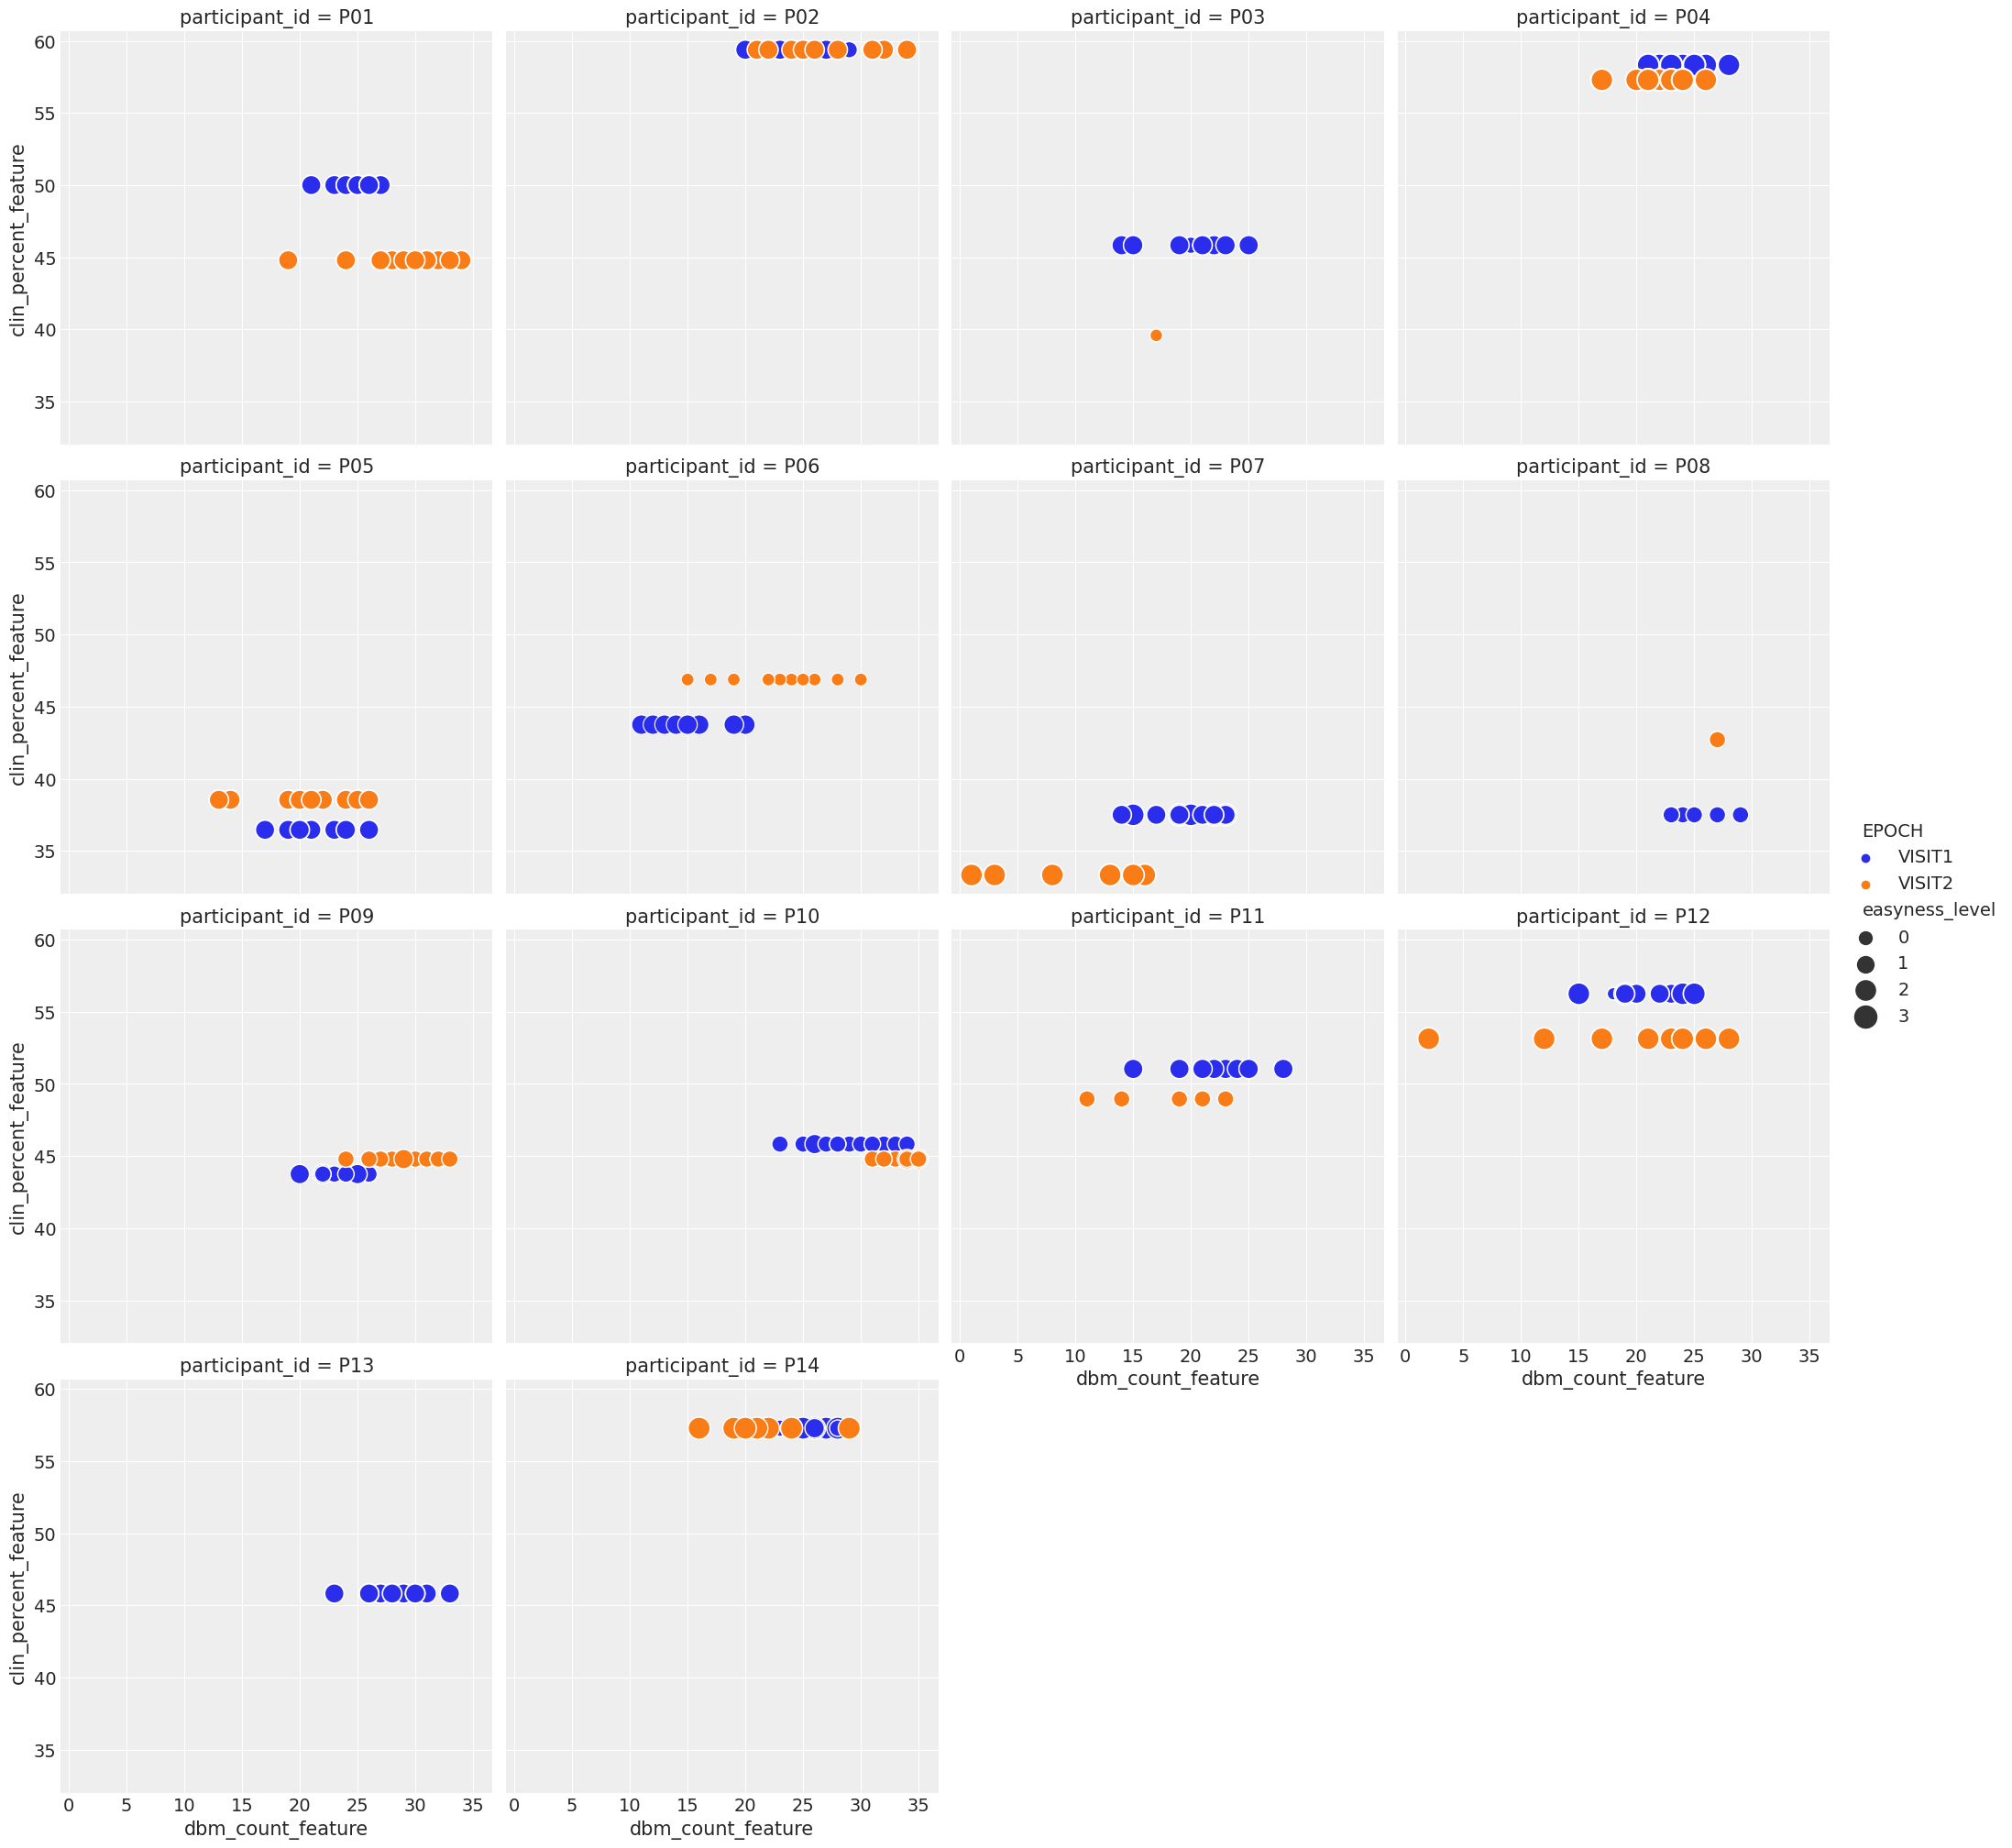

In [10]:
sns.relplot(
    data=df,
    x="dbm_count_feature",
    y="clin_percent_feature",
    hue="EPOCH",
    size="easyness_level",
    col="participant_id",
    col_wrap=4,
    sizes=(100, 300),
);

Per subject and per visit seems to make some relation pop up between `dbm` scores and the clinical feature.

/home/lpaz/anaconda3/envs/bayes_workshop/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  self.fig.tight_layout(*args, **kwargs)


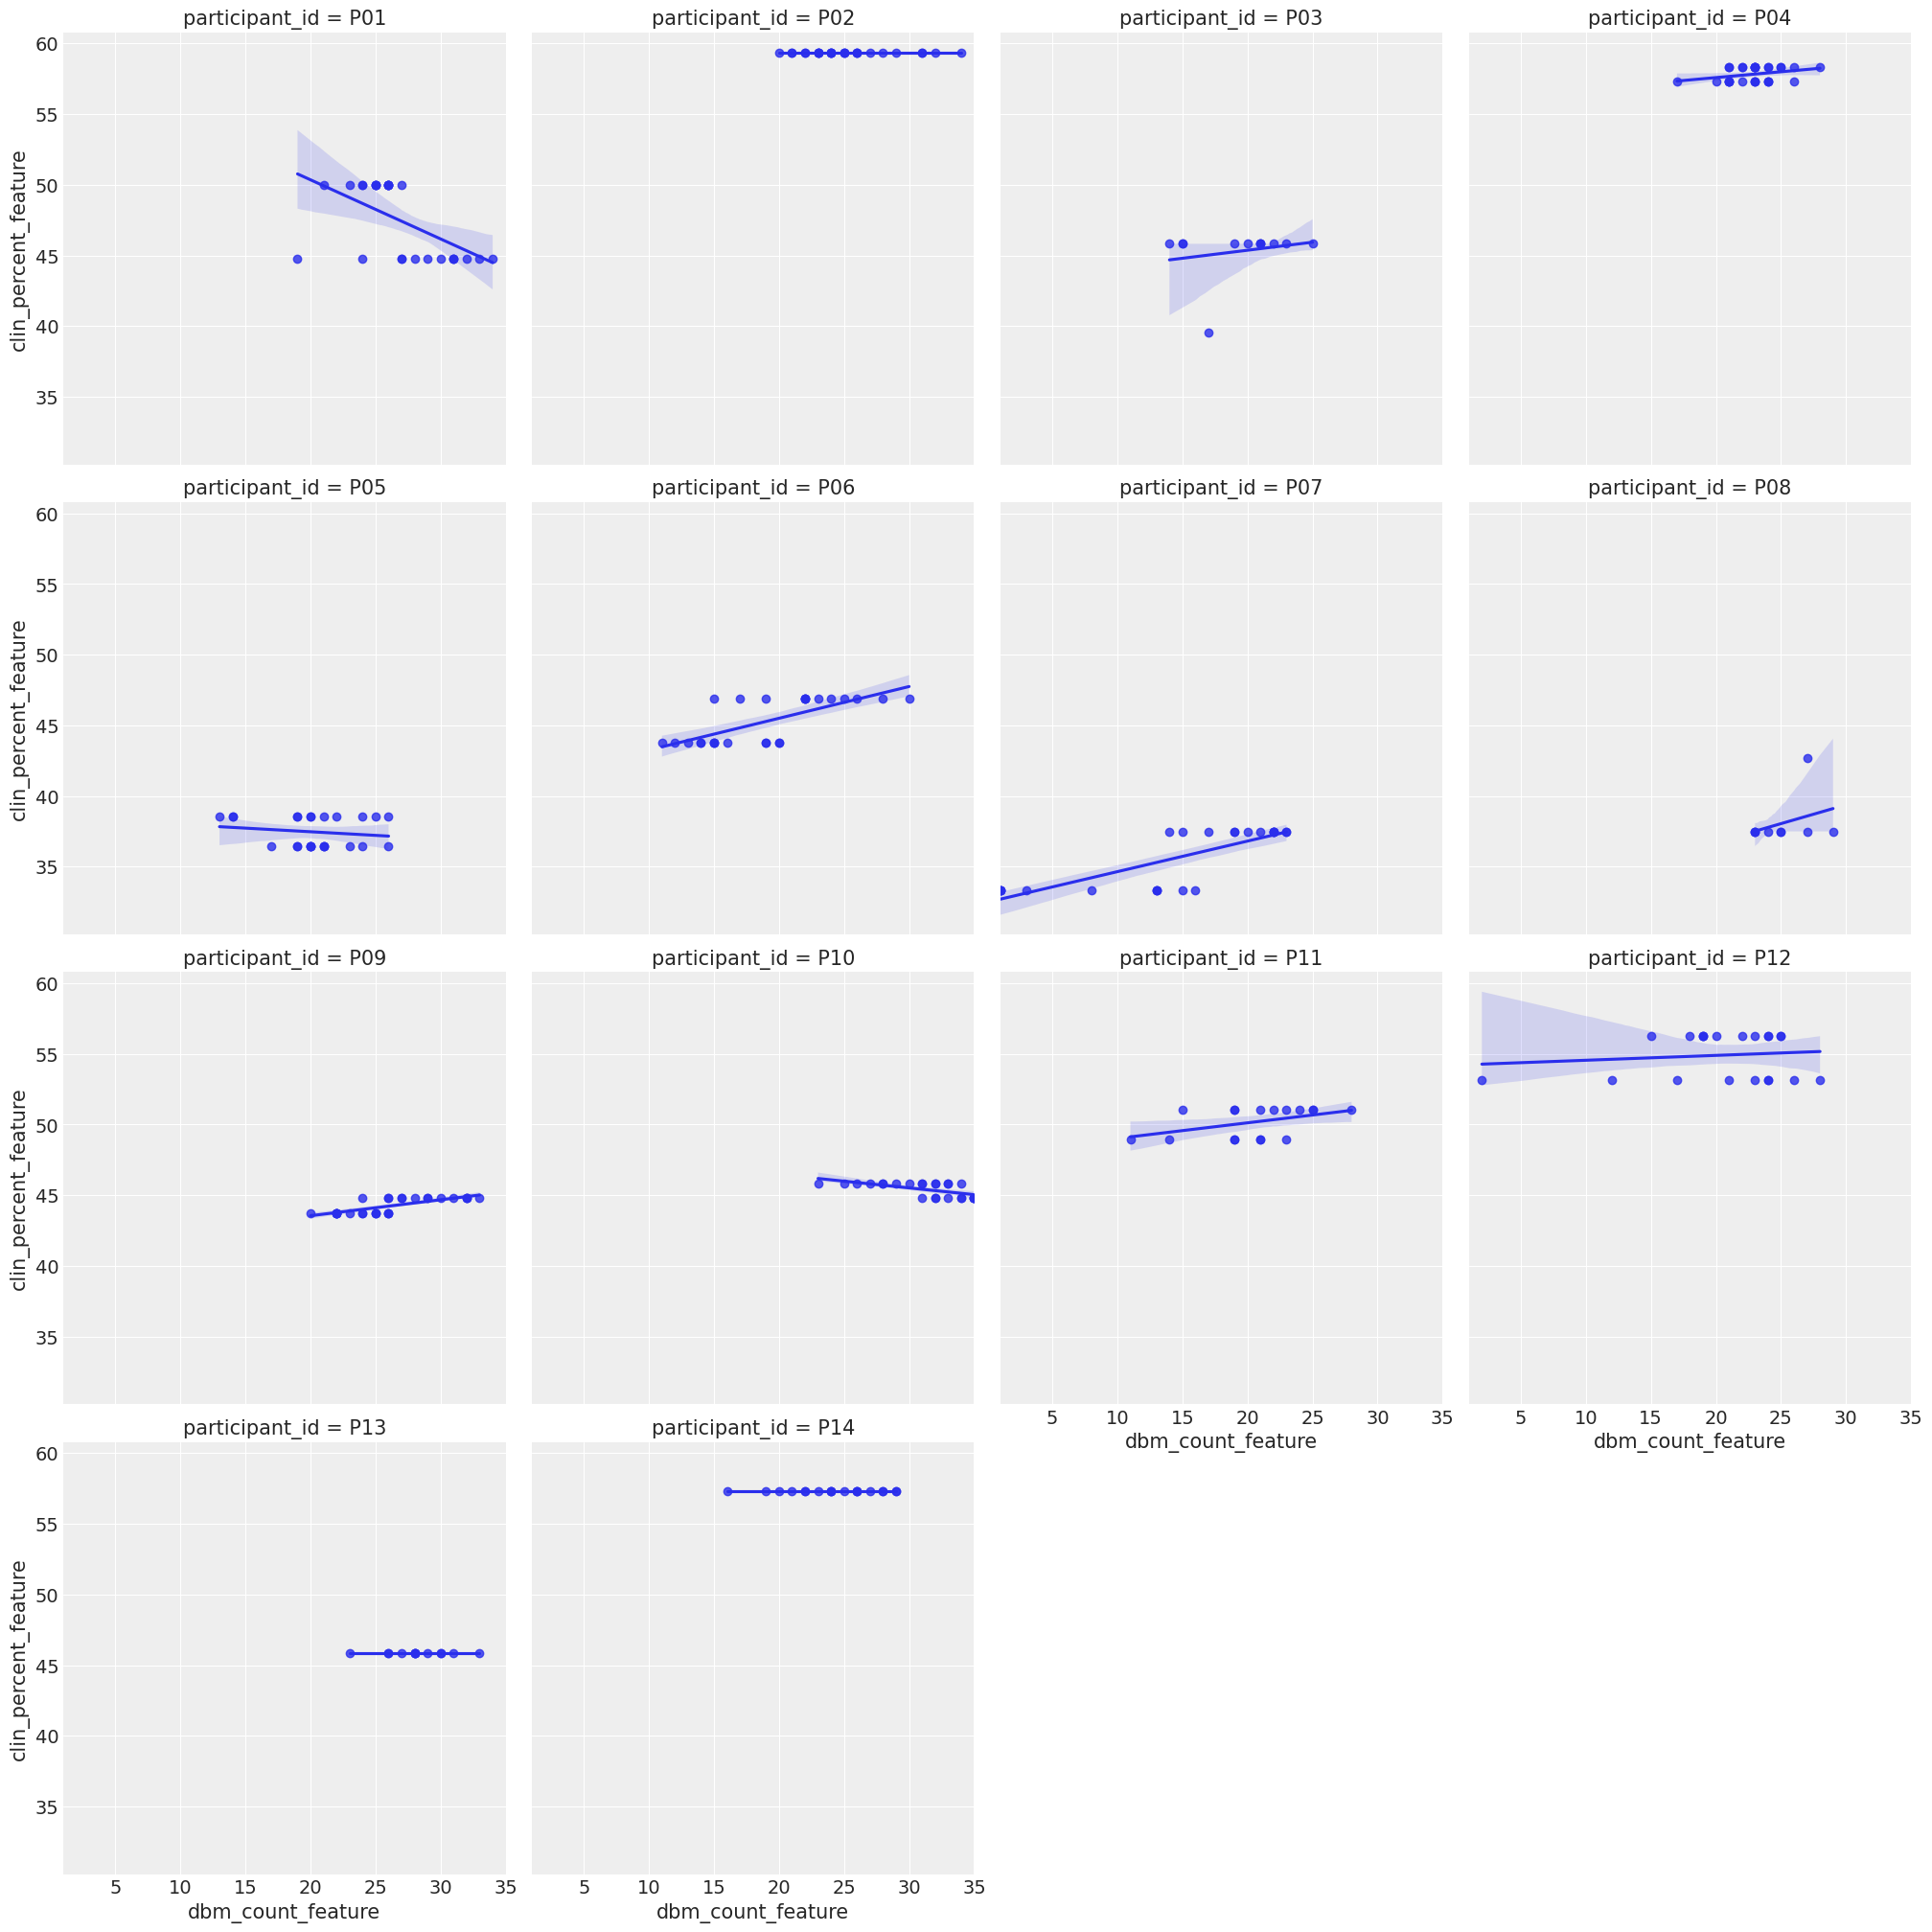

In [11]:
sns.lmplot(
    data=df,
    x="dbm_count_feature",
    y="clin_percent_feature",
    col="participant_id",
    col_wrap=4,
);

/home/lpaz/anaconda3/envs/bayes_workshop/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  self.fig.tight_layout(*args, **kwargs)


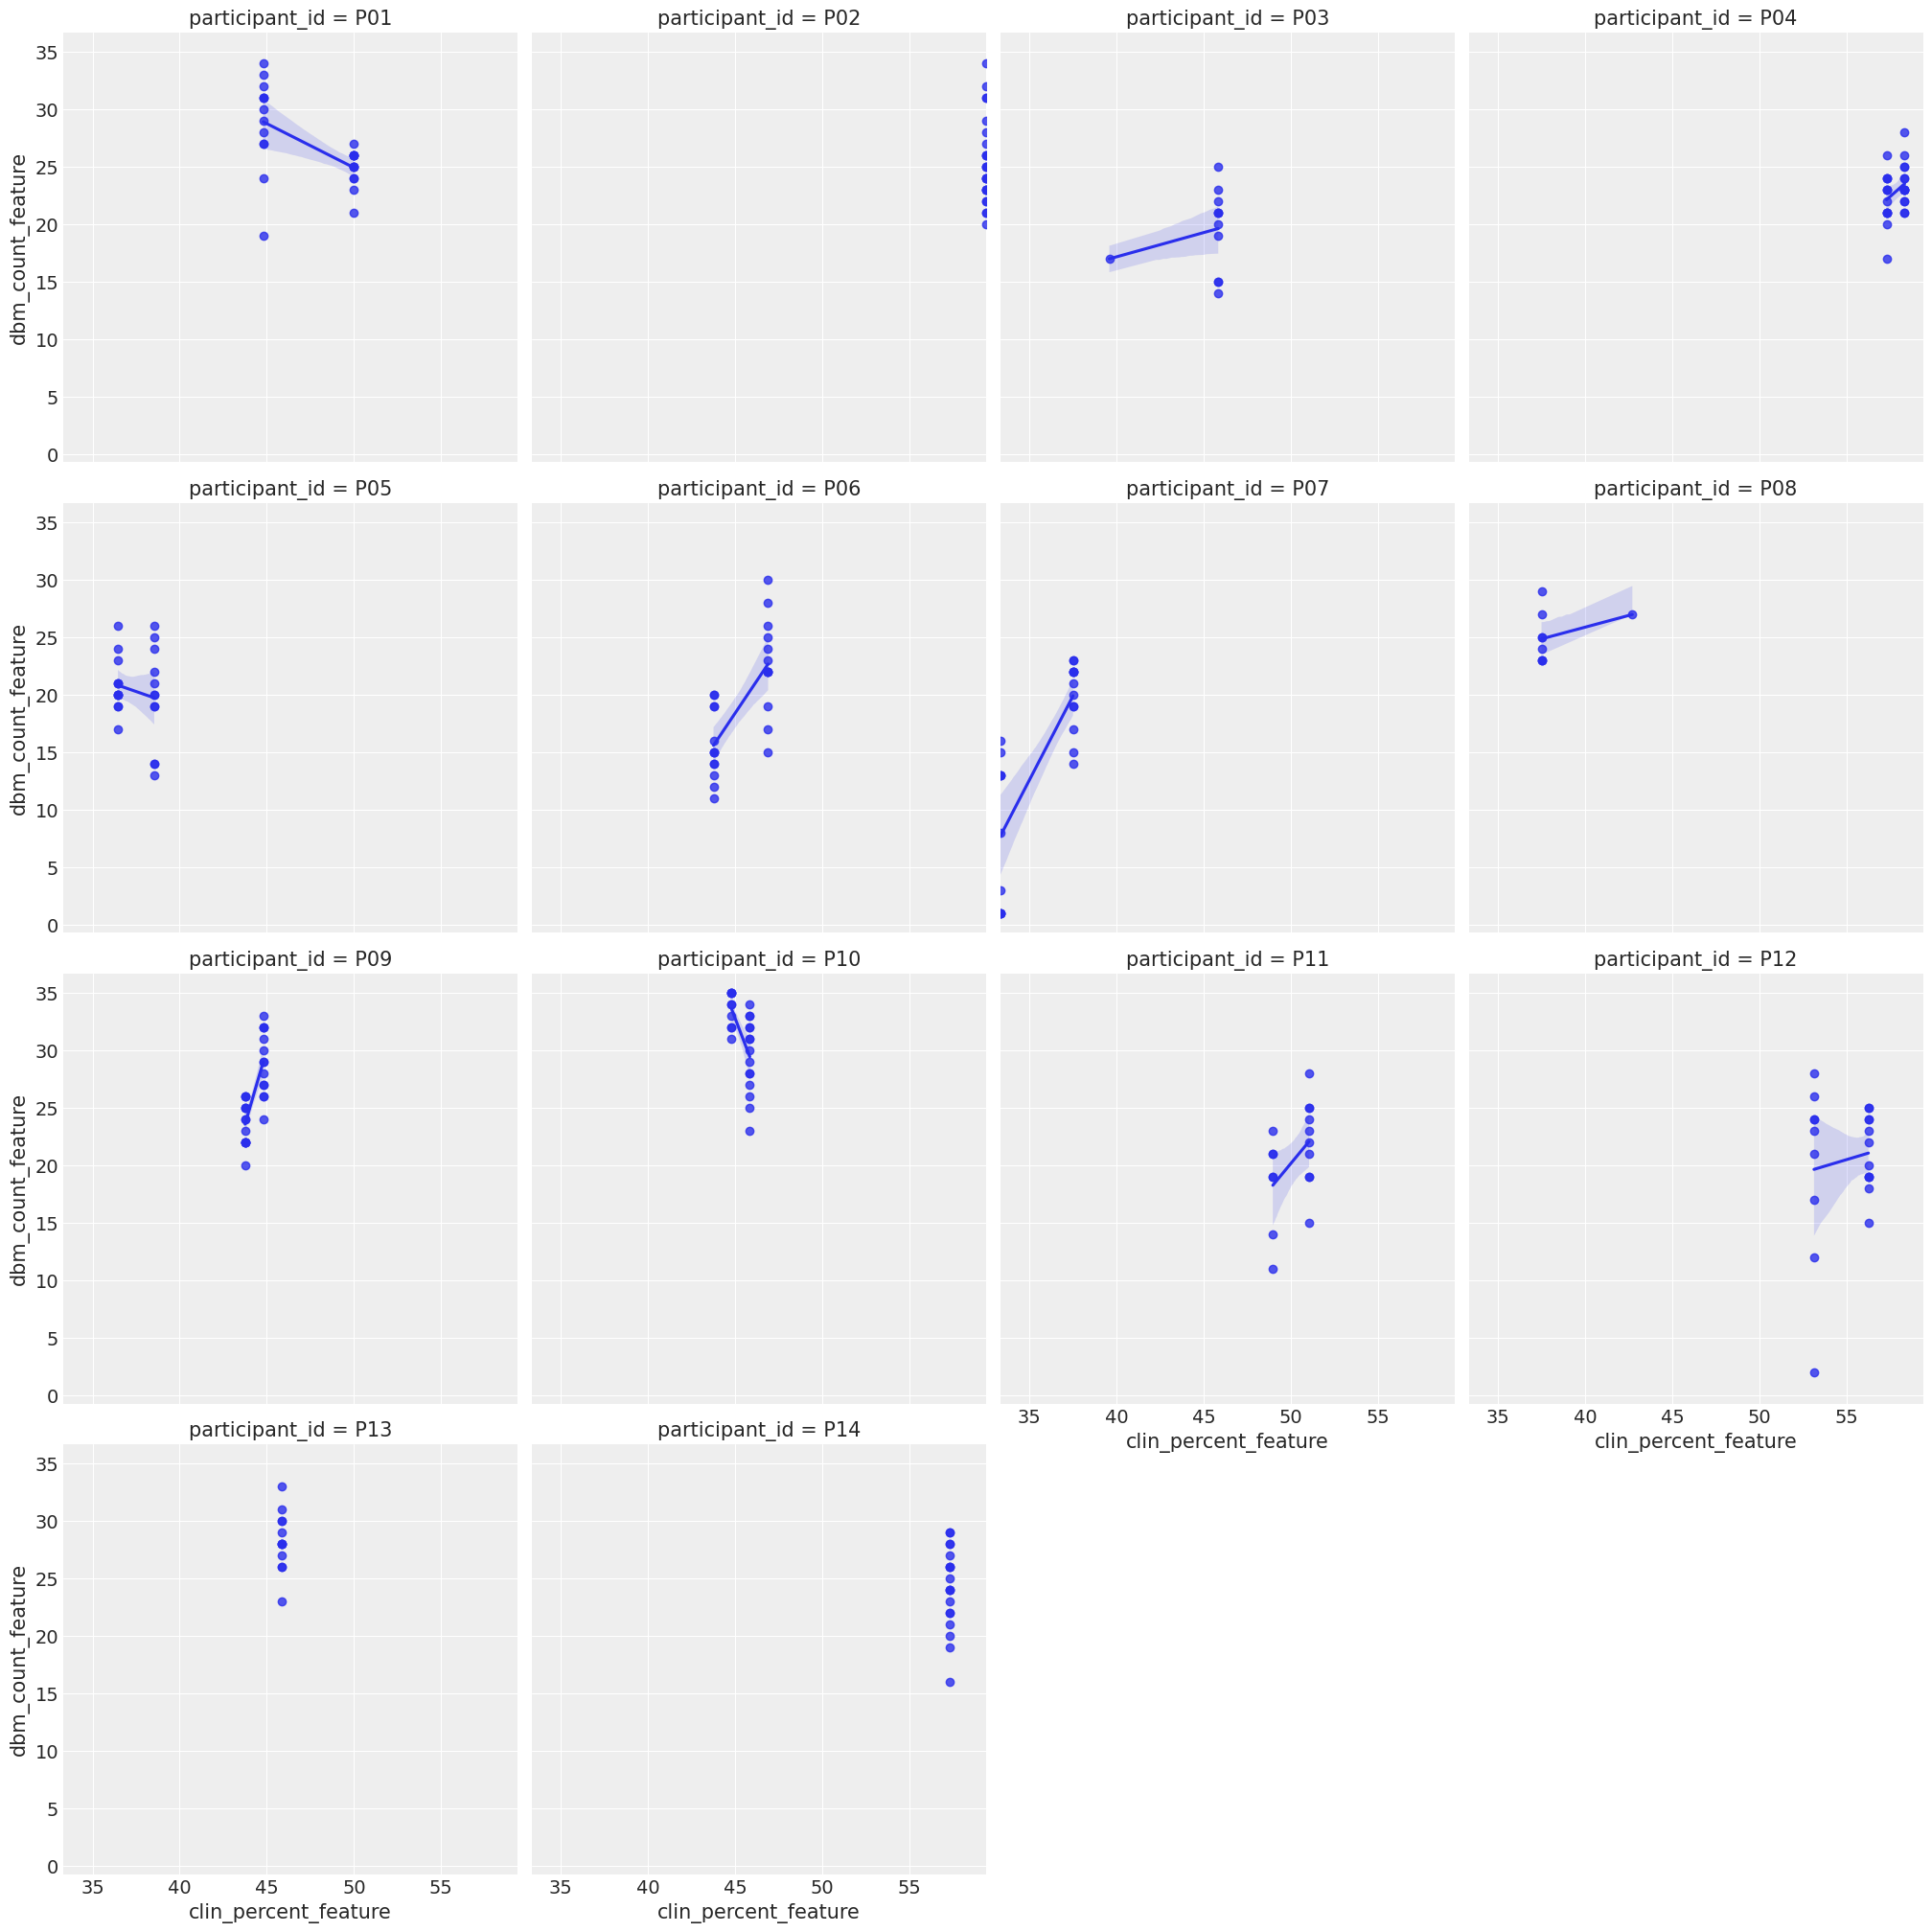

In [12]:
sns.lmplot(
    data=df,
    x="clin_percent_feature",
    y="dbm_count_feature",
    col="participant_id",
    col_wrap=4,
);

There is subject diversity and imbalanced data to perform the regression

/home/lpaz/anaconda3/envs/bayes_workshop/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  self.fig.tight_layout(*args, **kwargs)


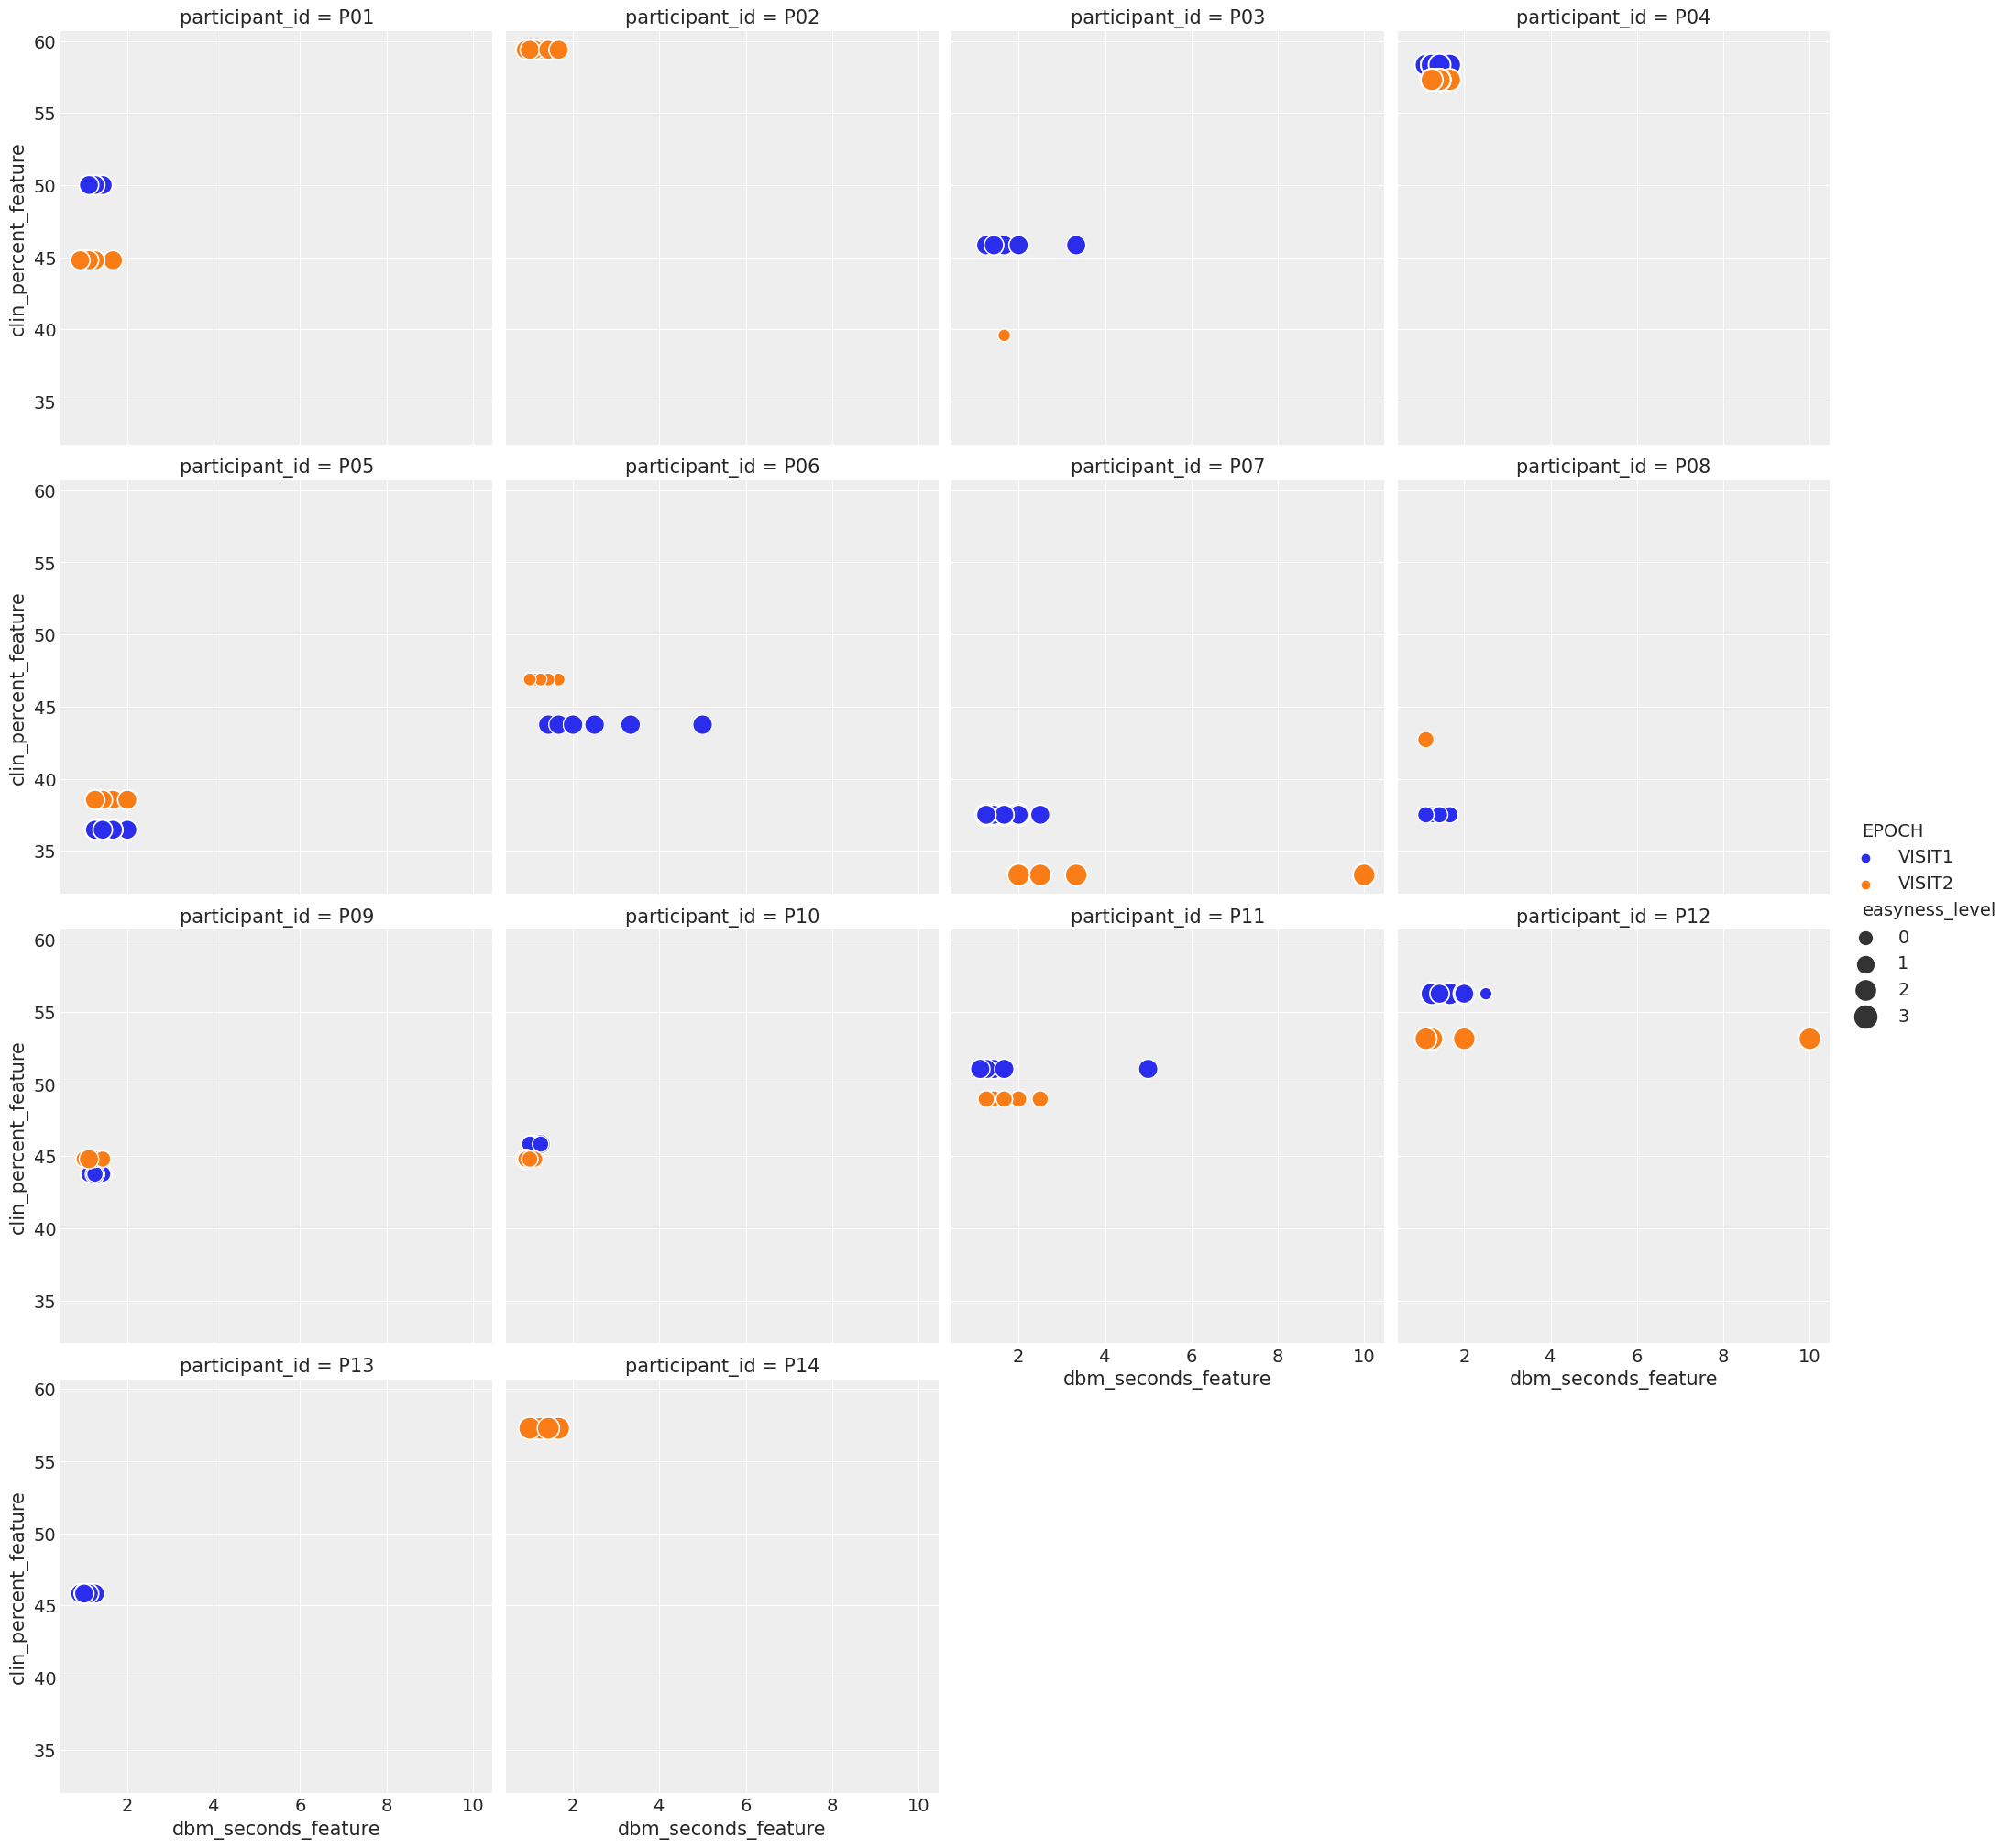

In [13]:
sns.relplot(
    data=df,
    x="dbm_seconds_feature",
    y="clin_percent_feature",
    hue="EPOCH",
    size="easyness_level",
    col="participant_id",
    col_wrap=4,
    sizes=(100, 300),
);

/home/lpaz/anaconda3/envs/bayes_workshop/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  self.fig.tight_layout(*args, **kwargs)


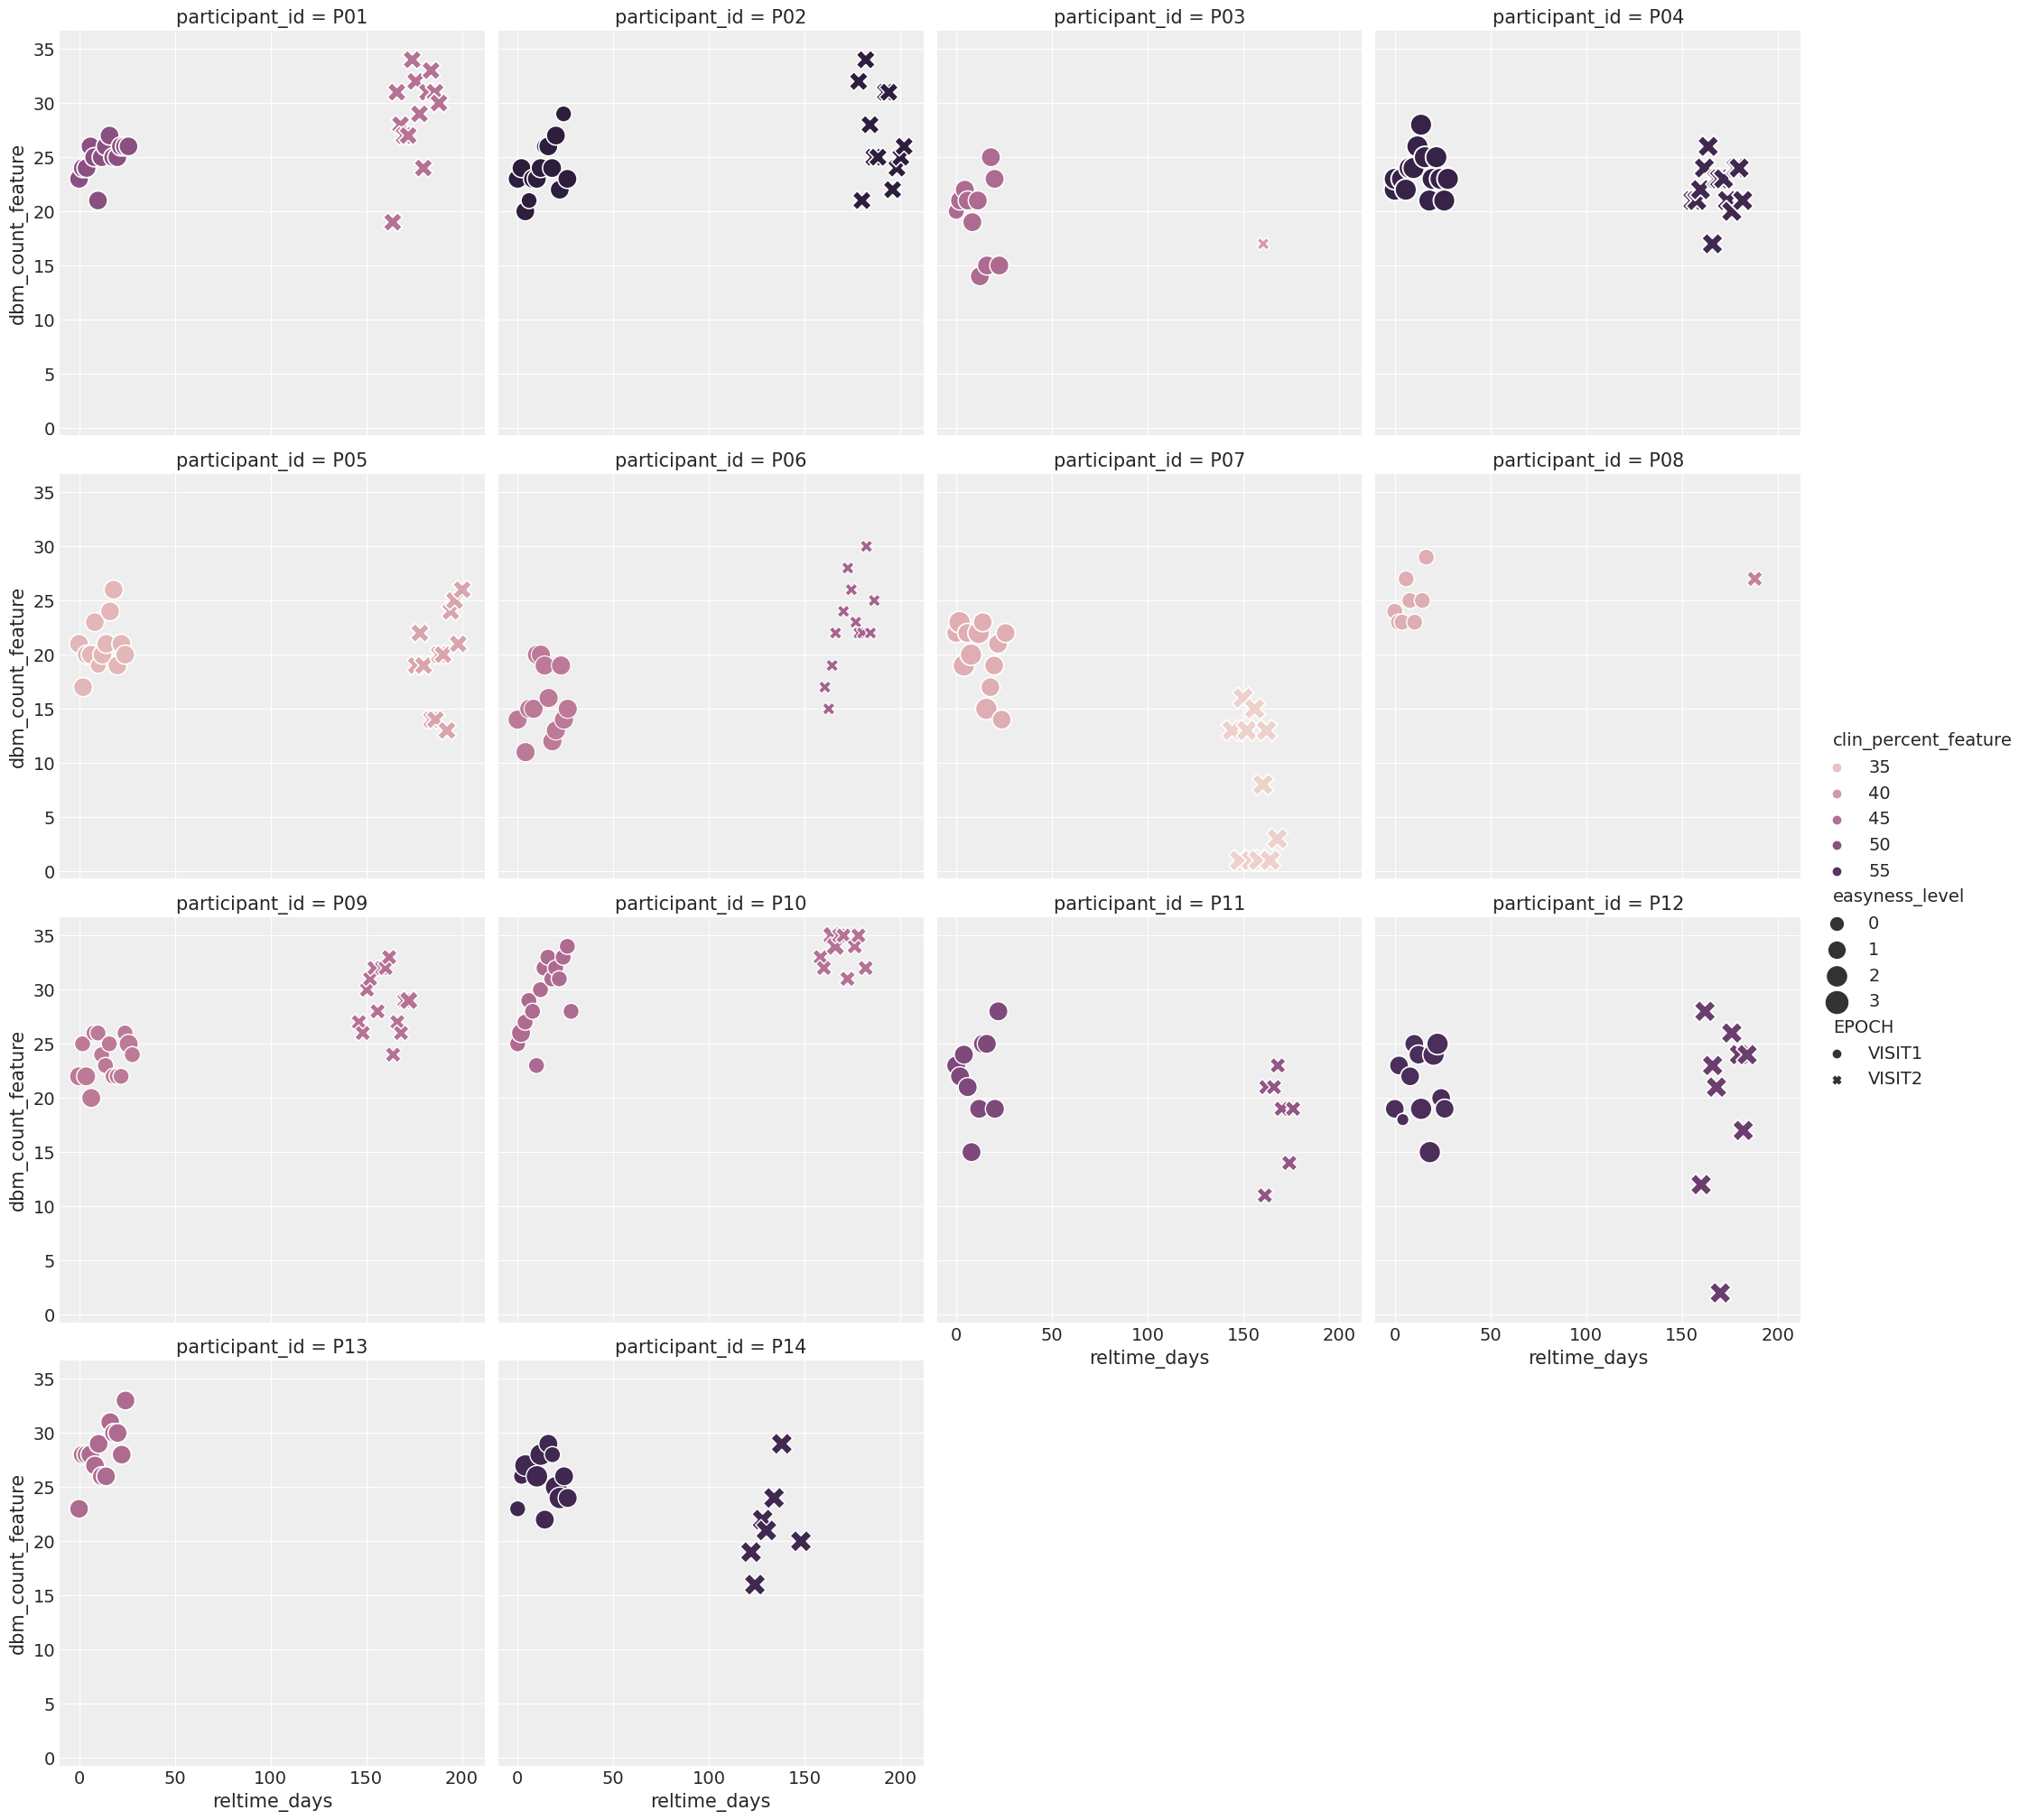

In [14]:
sns.relplot(
    data=df,
    x="reltime_days",
    y="dbm_count_feature",
    style="EPOCH",
    hue="clin_percent_feature",
    size="easyness_level",
    col="participant_id",
    col_wrap=4,
    sizes=(100, 300),
);

Difficult to identify a clear relation between the `dbm_count_feature` and the `reltime_days`.

## Modelling

As a first modelling step, we can apply a linear regression to the dataset, using the following features:

- `clin_percent_feature`
- `easyness_level`
- `age_years`

we attempt to predict the `dbm_count_feature` scores.

We suggest the following increasingly complex models:

1. Complete pooling model
2. Unpooled model
3. Hierarchical model that assumes independent intercepts/slopes between features
4. Hierarchical model that also models correlations between features

We should always look at the posterior predictive distribution to check that our predictions make sense.

#### Is this the only modelling avenue?

**SPOILER ALERT:** No

You can try out different ways to model the data, but the best approach is to understand how the data was _generated_ and try to model a realistic generative process.